In [498]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [499]:
#Reading in the data sets as a panadas dataframe 
test = pd.read_csv("test.csv") 
train = pd.read_csv("train.csv") 
genders = pd.read_csv("gender_submission.csv") 


In [500]:
##Before we start any machine learning techniques, we must first look at a summmary of our data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [501]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [502]:
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [503]:
#checking to see if there are any missing data in our datasets 

print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [504]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


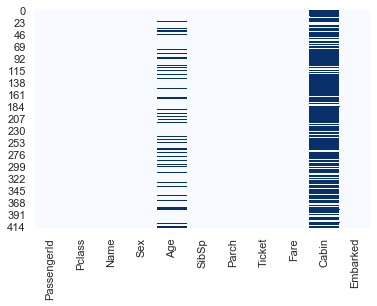

In [505]:
sns.heatmap(test.isnull(), cmap="Blues",cbar=False)

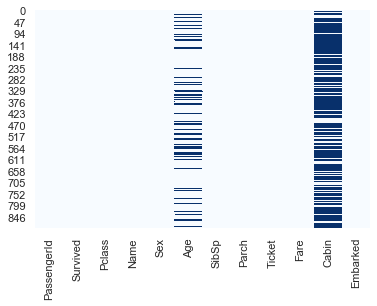

In [506]:
sns.heatmap(train.isnull(), cmap="Blues",cbar=False)

In [507]:
# Replace using median 
train['Age'] = train.Age.fillna(train.Age.median())
train["Embarked"].fillna(train["Embarked"].value_counts().idxmax(), inplace=True)

In [508]:
train.drop('Cabin', axis=1, inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

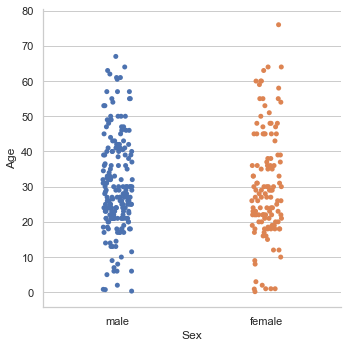

In [509]:
sns.catplot(x="Sex", y="Age", data=test);
plt.show()


In [510]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [511]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

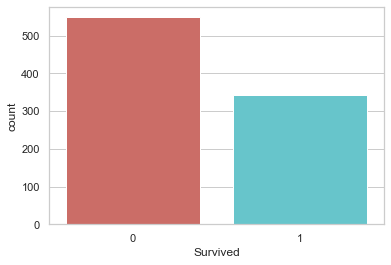

In [512]:
sns.countplot(x='Survived',data=train,palette='hls')
plt.show()

In [513]:
count_no_sub = len(train[train['Survived']==0])
count_sub = len(train[train['Survived']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Survived is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Survived", pct_of_sub*100)

percentage of no Survived is 61.61616161616161
percentage of Survived 38.38383838383838


Text(0, 0.5, 'Frequency of Survived')

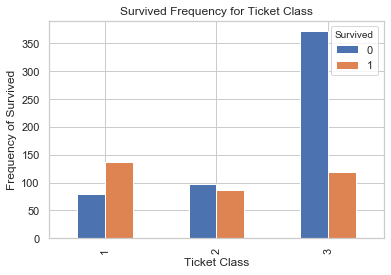

In [514]:
%matplotlib inline 
pd.crosstab(train.Pclass,train.Survived).plot(kind='bar')
plt.title('Survived Frequency for Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Frequency of Survived')

Text(0, 0.5, 'Frequency of Survived')

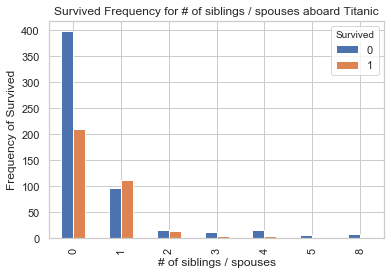

In [515]:
pd.crosstab(train.SibSp,train.Survived).plot(kind='bar')
plt.title('Survived Frequency for # of siblings / spouses aboard Titanic')
plt.xlabel('# of siblings / spouses')
plt.ylabel('Frequency of Survived')

Text(0, 0.5, 'Frequency of Survived')

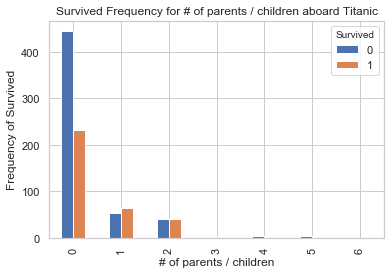

In [516]:
pd.crosstab(train.Parch,train.Survived).plot(kind='bar')
plt.title('Survived Frequency for # of parents / children aboard Titanic')
plt.xlabel('# of parents / children')
plt.ylabel('Frequency of Survived')

Text(0, 0.5, 'Frequency of Survived')

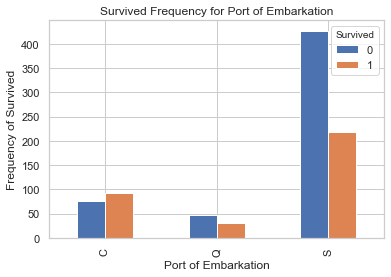

In [517]:
pd.crosstab(train.Embarked,train.Survived).plot(kind='bar')
plt.title('Survived Frequency for Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Frequency of Survived')

Text(0, 0.5, 'Frequency of Survived')

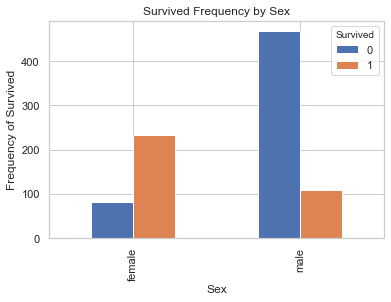

In [518]:
pd.crosstab(train.Sex,train.Survived).plot(kind='bar')
plt.title('Survived Frequency by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency of Survived')

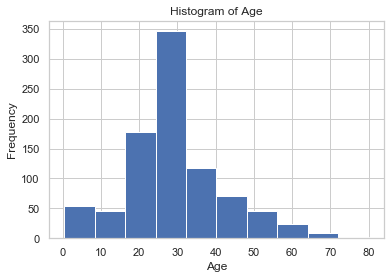

In [519]:
train.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


In [520]:
## Create categorical variable for traveling alone
train['TravelAlone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
train['TravelAlone']

0      0
1      0
2      1
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     0
28     1
29     1
      ..
861    0
862    1
863    0
864    1
865    1
866    0
867    1
868    1
869    0
870    1
871    0
872    1
873    1
874    0
875    1
876    1
877    1
878    1
879    0
880    0
881    1
882    1
883    1
884    1
885    0
886    1
887    1
888    0
889    1
890    1
Name: TravelAlone, Length: 891, dtype: int64

In [521]:
trainset = train


In [522]:
trainset=pd.get_dummies(trainset, columns=["Pclass","Embarked","Sex"])
trainset.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [523]:
#drop the sex,embarked,name and tickets columns
trainset.drop(['Sex_female','Name','Ticket','PassengerId','SibSp','Parch'],axis=1,inplace=True)

KeyError: "['SibSp' 'Parch'] not found in axis"

In [524]:
#check the head of dataframe
trainset.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [525]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [526]:
testset = test 
testset["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
testset["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)
testset.drop("Cabin", axis=1, inplace=True)

testset['TravelAlone']=np.where((testset["SibSp"]+testset["Parch"])>0, 0, 1)

In [527]:
testset=pd.get_dummies(testset, columns=["Pclass","Embarked","Sex"])
testset.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,0,1,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1,0,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,0,1,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,1,0,0,1,1,0


In [528]:

#drop the sex,embarked,name and tickets columns
testset.drop(['Sex_female','Name','Ticket','PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [529]:
testset.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [530]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_Q","Embarked_S","Sex_male"] 
X = trainset[cols]
y = trainset['Survived']

In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logmodel = LogisticRegression()

In [532]:
# create the RFE model and select 8 variables
rfe = RFE(logmodel, 10)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


/Users/alice/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


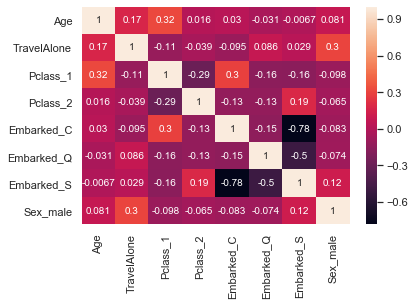

In [533]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q',
                     'Embarked_S', 'Sex_male']
X = trainset[Selected_features]

sns.heatmap(X.corr(), annot=True)
plt.show()

In [534]:
from sklearn.model_selection import train_test_split

In [535]:
X = trainset[Selected_features]
y = trainset['Survived']

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [537]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/alice/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [538]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.476
LogisticRegression auc is 0.849


In [543]:
testset['Survived'] = logreg.predict(testset[Selected_features])
testset['PassengerId'] = test['PassengerId']


In [544]:
submission = testset[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
